# Using Epistorm-Mix Contact Matrices

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/epistorm/epydemix/blob/main/tutorials/11_Epistorm_Mix_Matrices.ipynb)

In this tutorial, we explore the new demographic attributes and contact matrices introduced by the [Epistorm-Mix](https://www.epistorm.org/data/epistorm-mix) project. In addition to the traditional **age**-based contact matrices, epydemix now supports two new demographic attributes:

- **sex**: contact patterns stratified by sex
- **race_ethnicity**: contact patterns stratified by race/ethnicity

These new matrices are available via the `litvinova_2025` contact source for the United States, based on the work by [Litvinova et al. (2025)](https://www.medrxiv.org/content/10.1101/2025.11.20.25340662v1).

If you are running this tutorial on Google Colab, you can install the needed packages by running the following cell:

In [1]:
import sys, os, subprocess
if "google.colab" in sys.modules or os.getenv("COLAB_RELEASE_TAG"):
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", "-r",
                    "https://raw.githubusercontent.com/epistorm/epydemix/refs/heads/main/tutorials/colab_requirements.txt"])

## 1. Importing Population Data by Demographic Attribute

We start by importing the U.S. population stratified by the three available demographic attributes: `age`, `sex`, and `race_ethnicity`.

In [2]:
from epydemix.population import load_epydemix_population

# Load population stratified by age (using the litvinova_2025 source)
pop_age = load_epydemix_population("United_States", contacts_source="litvinova_2025")
print(pop_age)

Population(name='United_States')
Demographic groups: 5 groups
Population distribution:
  - 0-4: 18608139 individuals
  - 5-19: 63540783 individuals
  - 20-49: 132780169 individuals
  - 50-64: 63172279 individuals
  - 65+: 60019216 individuals
Contact matrices: 4 layers
Available layers:
  - school
  - work
  - home
  - community



In [3]:
# Load population stratified by sex
pop_sex = load_epydemix_population("United_States", attribute="sex")
print(pop_sex)

Population(name='United_States')
Demographic groups: 2 groups
Population distribution:
  - Female: 172160287 individuals
  - Male: 165960299 individuals
Contact matrices: 4 layers
Available layers:
  - school
  - work
  - home
  - community



In [4]:
# Load population stratified by race/ethnicity
pop_race = load_epydemix_population("United_States", attribute="race_ethnicity")
print(pop_race)

Population(name='United_States')
Demographic groups: 5 groups
Population distribution:
  - Asian: 20013598 individuals
  - Black: 40744244 individuals
  - Hispanic/Latino: 63329571 individuals
  - Other: 18477096 individuals
  - White: 195556076 individuals
Contact matrices: 4 layers
Available layers:
  - school
  - work
  - home
  - community



## 2. Visualizing Contact Matrices by Sex

Let's visualize the contact matrices for the **sex** attribute across all four contact layers.

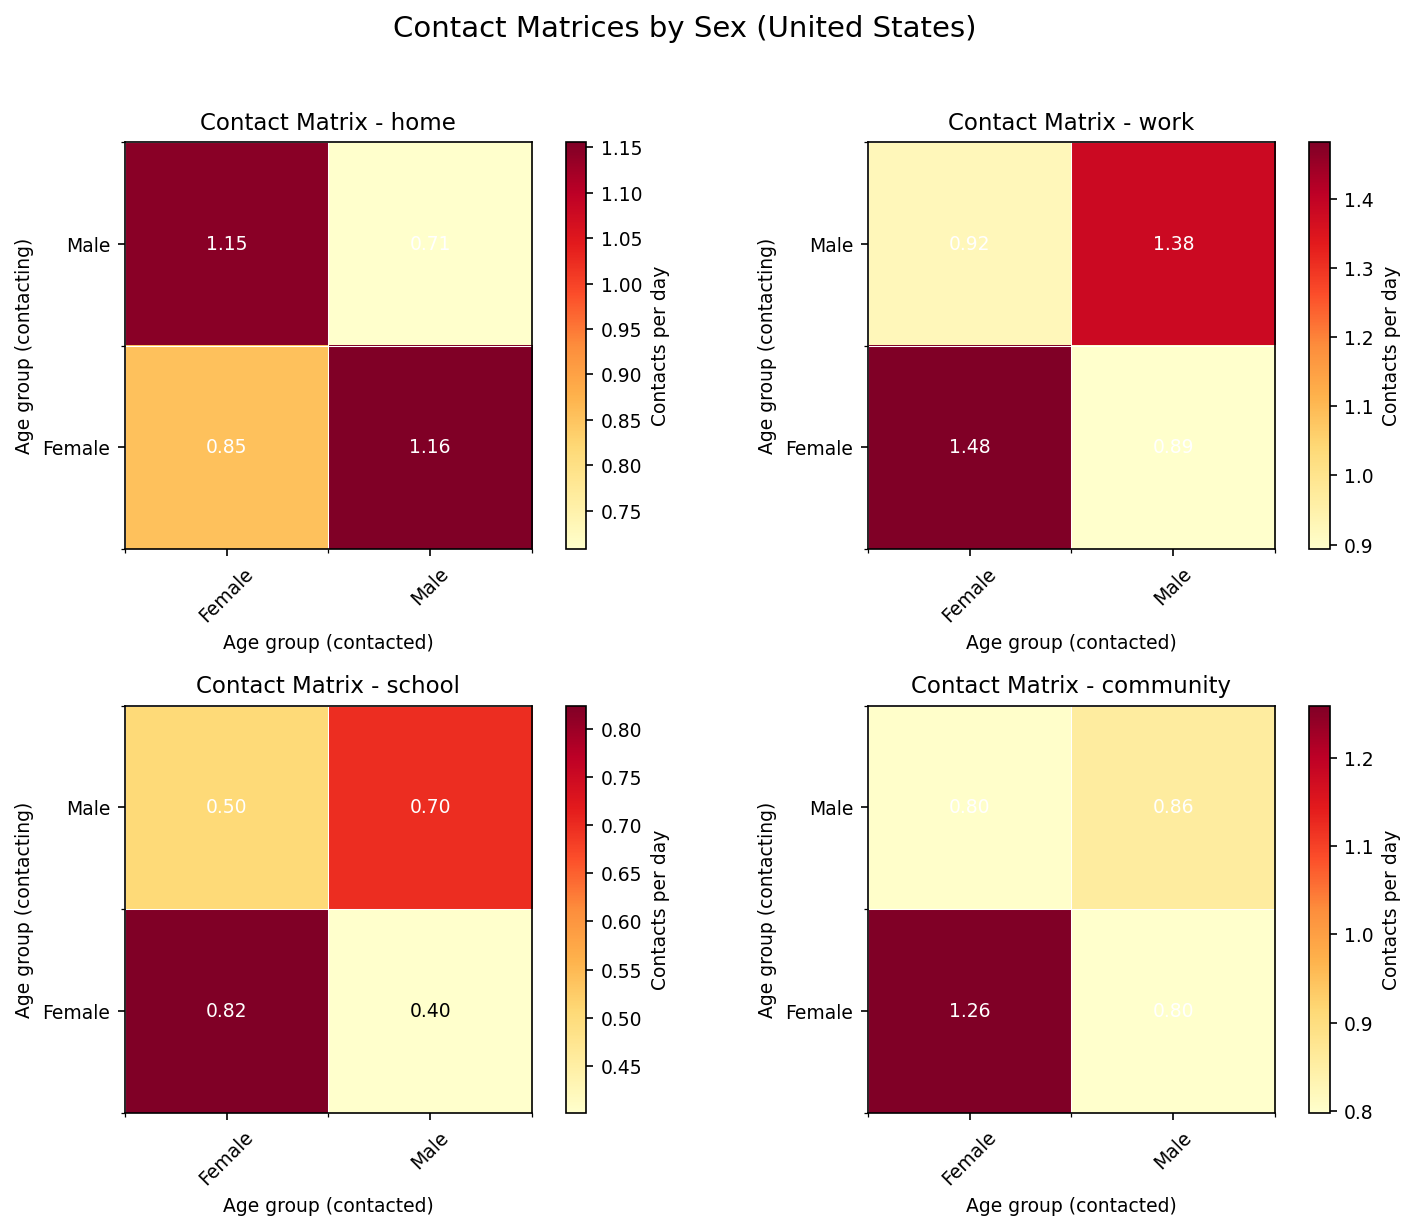

In [5]:
from epydemix.visualization import plot_contact_matrix, plot_population
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi=150)
for ax, layer in zip(axes.flatten(), ["home", "work", "school", "community"]):
    plot_contact_matrix(pop_sex, layer, ax=ax, fontsize=9, show_values=True, fmt=".2f")
fig.suptitle("Contact Matrices by Sex (United States)", fontsize=14, y=1.02)
plt.tight_layout()

We can also look at the population distribution by sex:

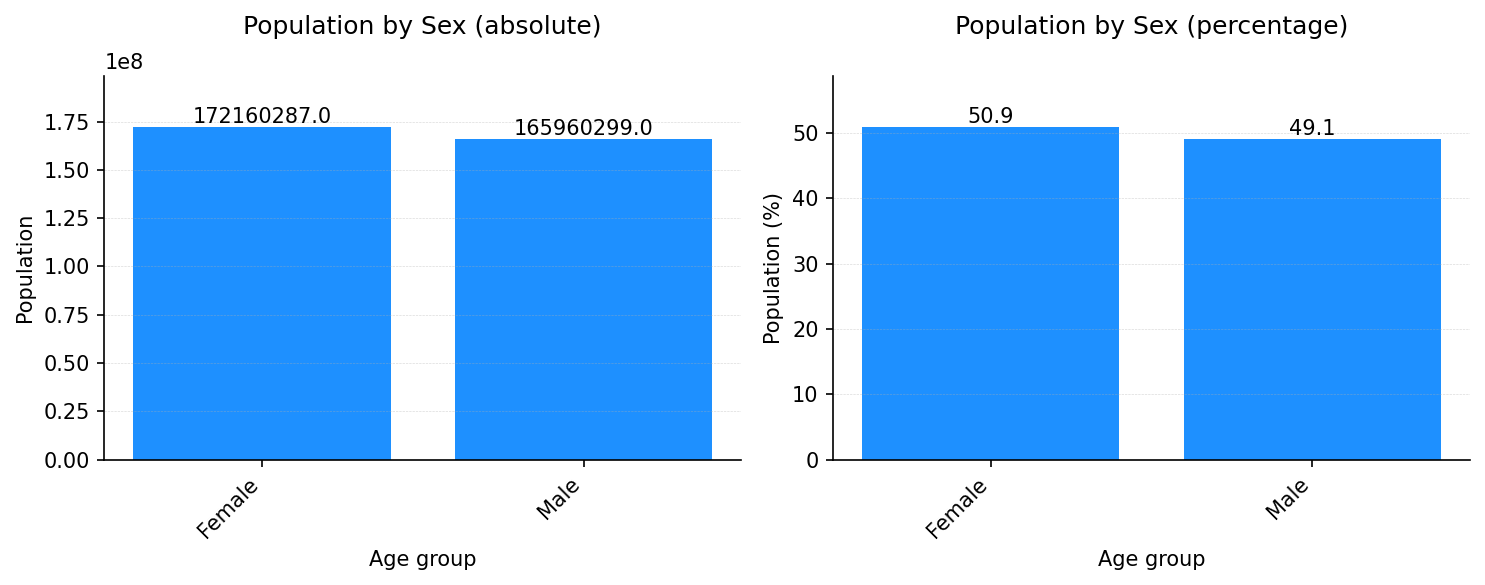

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=150)
plot_population(pop_sex, ax=axes[0], title="Population by Sex (absolute)")
plot_population(pop_sex, ax=axes[1], title="Population by Sex (percentage)", show_perc=True)
plt.tight_layout()

## 3. Visualizing Contact Matrices by Race/Ethnicity

Similarly, let's visualize the contact matrices for the **race_ethnicity** attribute.

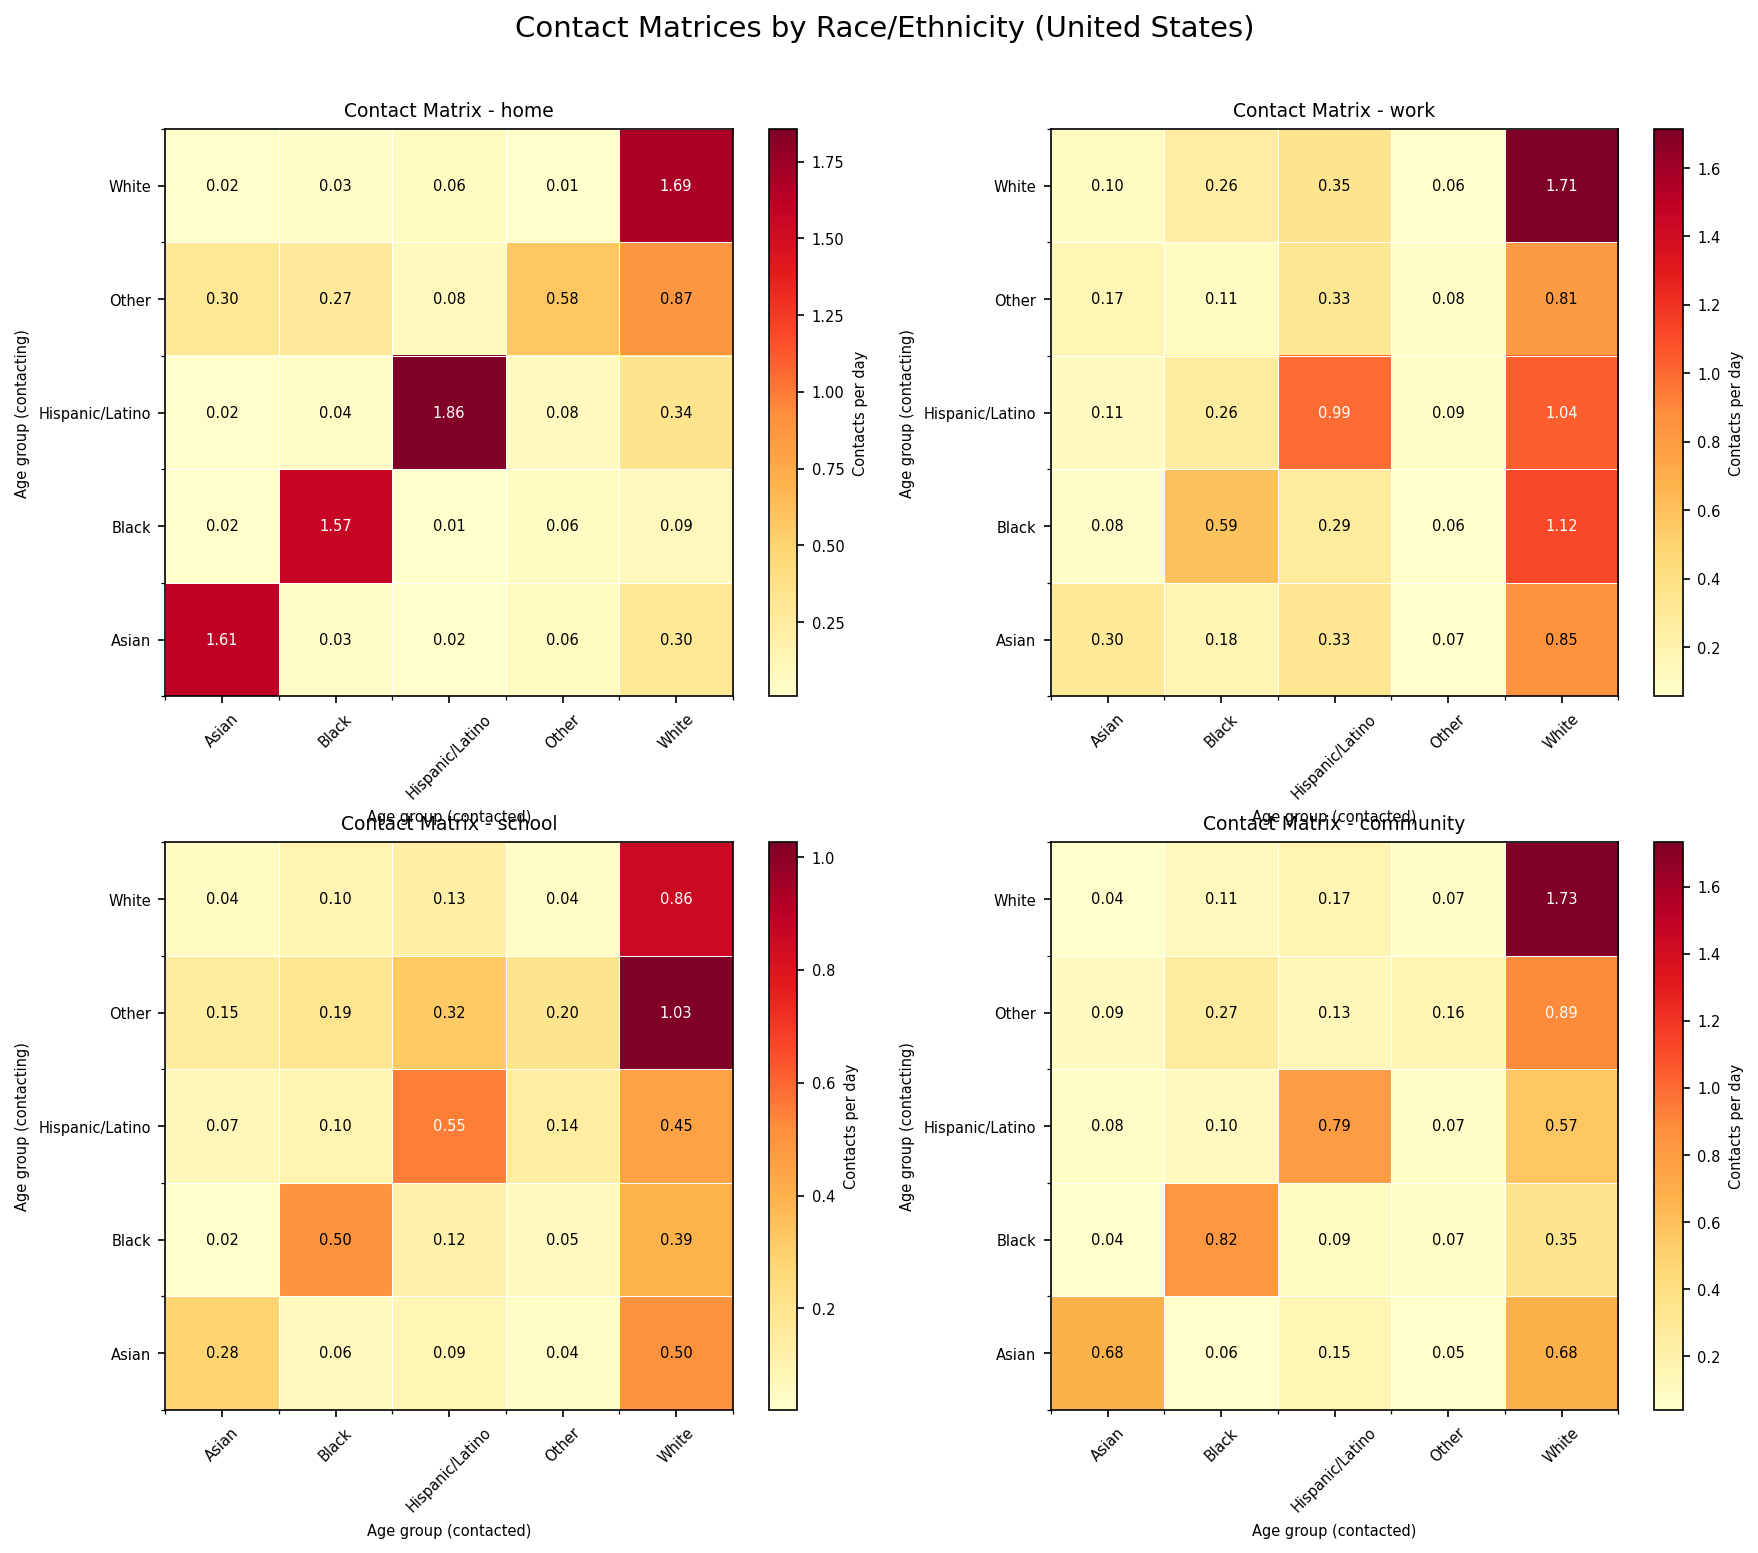

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), dpi=150)
for ax, layer in zip(axes.flatten(), ["home", "work", "school", "community"]):
    plot_contact_matrix(pop_race, layer, ax=ax, fontsize=7, show_values=True, fmt=".2f")
fig.suptitle("Contact Matrices by Race/Ethnicity (United States)", fontsize=14, y=1.02)
plt.tight_layout()

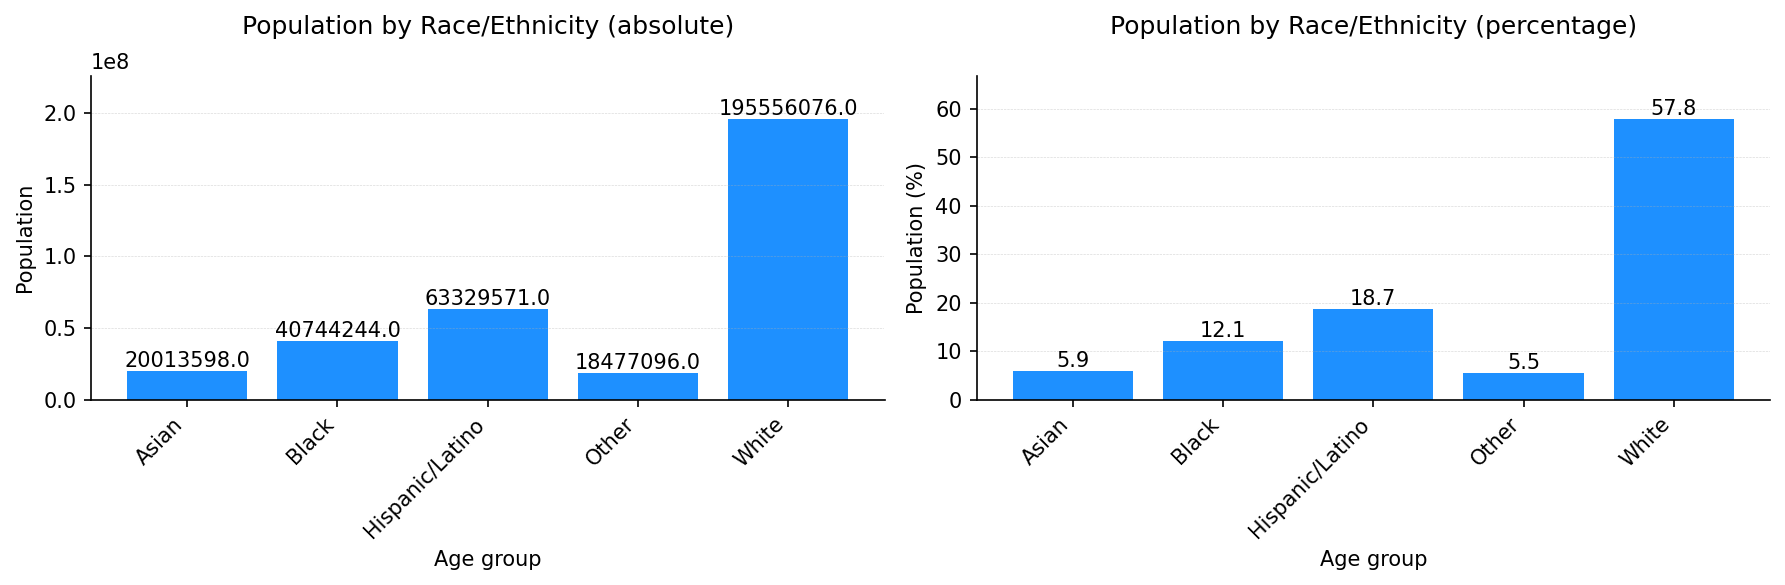

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=150)
plot_population(pop_race, ax=axes[0], title="Population by Race/Ethnicity (absolute)")
plot_population(pop_race, ax=axes[1], title="Population by Race/Ethnicity (percentage)", show_perc=True)
plt.tight_layout()

## 4. Comparing Mean Contacts Across Demographic Groups

We can compute the mean number of contacts per person per day for each demographic group within each layer. This is done by computing the row sums of each contact matrix, which give the total contacts per person in each group, and then comparing them across groups.

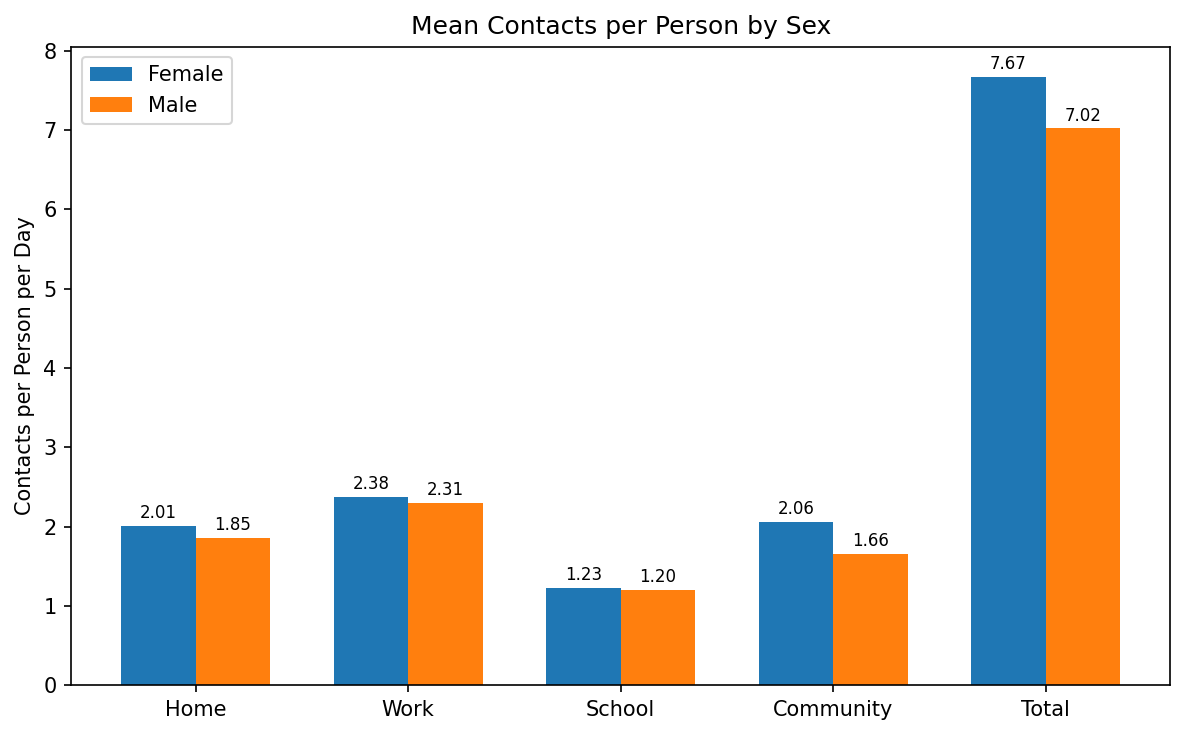

In [9]:
import numpy as np
import pandas as pd

layers = ["home", "work", "school", "community"]

def get_per_group_contacts(population, layers):
    """Compute total contacts per person per day for each demographic group (row sums of contact matrices)."""
    total = np.zeros(len(population.Nk))
    per_layer = {}
    for layer in layers:
        row_sums = population.contact_matrices[layer].sum(axis=1)
        per_layer[layer] = row_sums
        total += row_sums
    per_layer["total"] = total
    return per_layer

# Compute per-group contacts for sex
contacts_sex = get_per_group_contacts(pop_sex, layers)

# Plot: mean contacts per group by sex
fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
x = np.arange(len(layers) + 1)
width = 0.35
layer_labels = [l.capitalize() for l in layers] + ["Total"]

for i, name in enumerate(pop_sex.Nk_names):
    values = [contacts_sex[l][i] for l in layers] + [contacts_sex["total"][i]]
    bars = ax.bar(x + i * width, values, width, label=str(name))
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                f"{val:.2f}", ha="center", va="bottom", fontsize=8)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(layer_labels)
ax.set_ylabel("Contacts per Person per Day")
ax.set_title("Mean Contacts per Person by Sex")
ax.legend()
plt.tight_layout()

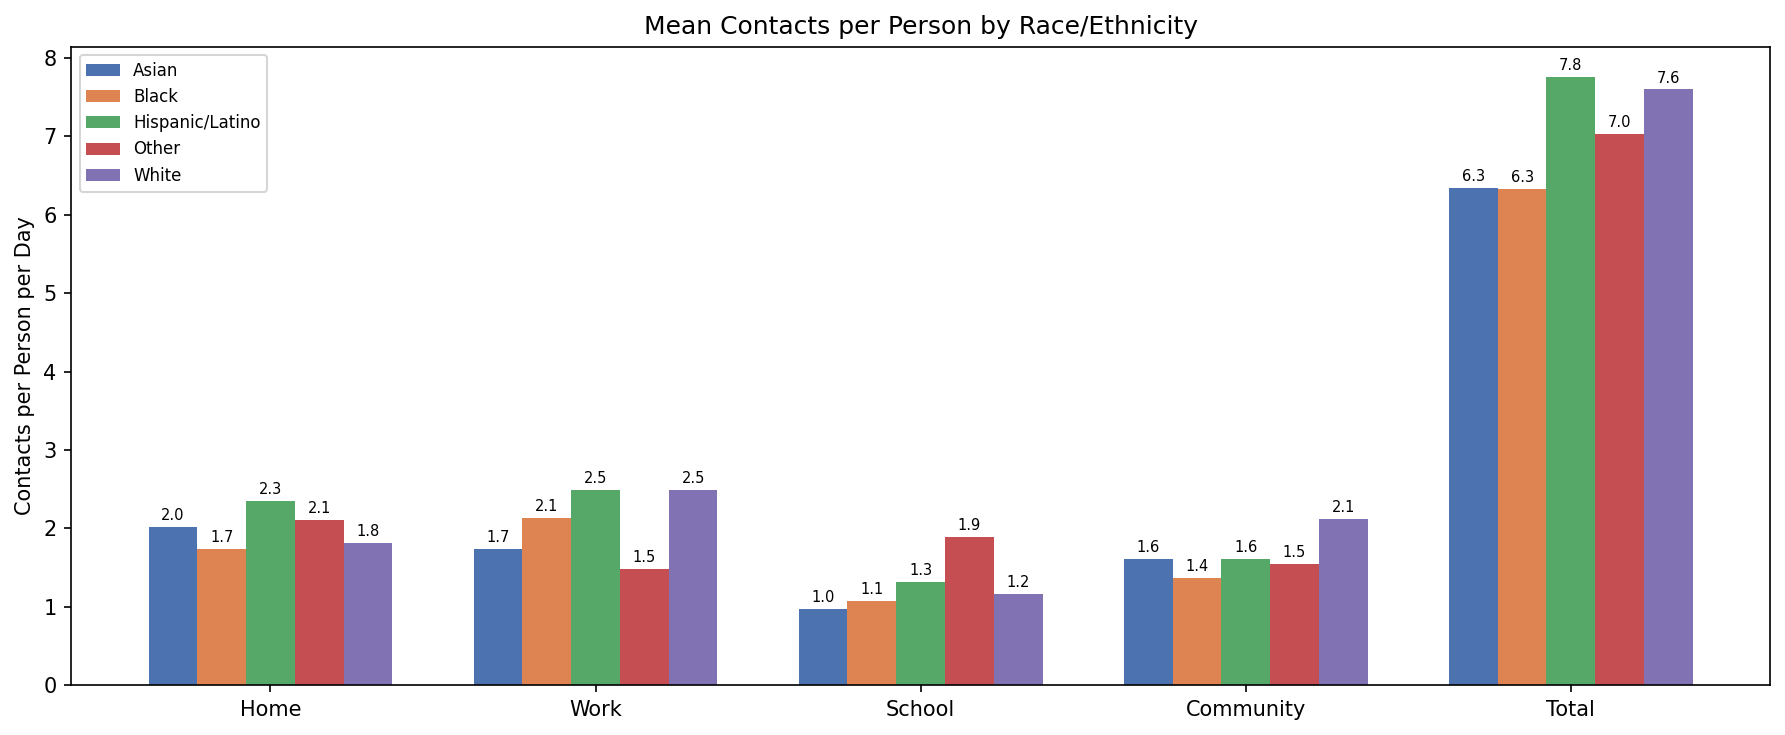

In [10]:
# Compute per-group contacts for race/ethnicity
contacts_race = get_per_group_contacts(pop_race, layers)

fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
n_groups = len(pop_race.Nk_names)
x = np.arange(len(layers) + 1)
width = 0.15
colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3"]

for i, name in enumerate(pop_race.Nk_names):
    values = [contacts_race[l][i] for l in layers] + [contacts_race["total"][i]]
    bars = ax.bar(x + i * width, values, width, label=str(name), color=colors[i])
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                f"{val:.1f}", ha="center", va="bottom", fontsize=7)

ax.set_xticks(x + width * (n_groups - 1) / 2)
ax.set_xticklabels([l.capitalize() for l in layers] + ["Total"])
ax.set_ylabel("Contacts per Person per Day")
ax.set_title("Mean Contacts per Person by Race/Ethnicity")
ax.legend(fontsize=8)
plt.tight_layout()

## 5. Running an SIR Simulation by Sex

Now let's run an SIR epidemic simulation using the sex-stratified population and contact matrices.

In [18]:
from epydemix import load_predefined_model
from epydemix.visualization import plot_quantiles

# Create an SIR model
model_sex = load_predefined_model("SIR", transmission_rate=0.035, recovery_rate=0.1)

# Set the sex-stratified population
model_sex.set_population(pop_sex)

print(model_sex)

EpiModel(name='EpiModel')
Compartments: 3
  Susceptible, Infected, Recovered
Transitions: 2
  Transitions between compartments:
    Susceptible -> Infected, params: ('transmission_rate', 'Infected') (kind: mediated)
    Infected -> Recovered, params: recovery_rate (kind: spontaneous)
Parameters: 2
  Model parameters:
    transmission_rate: 0.035
    recovery_rate: 0.1
Population: United_States
  Population size: 338120586 individuals
  Demographic groups: 2
    Female, Male



Text(0.5, 1.0, 'SIR Model - Stratified by Sex')

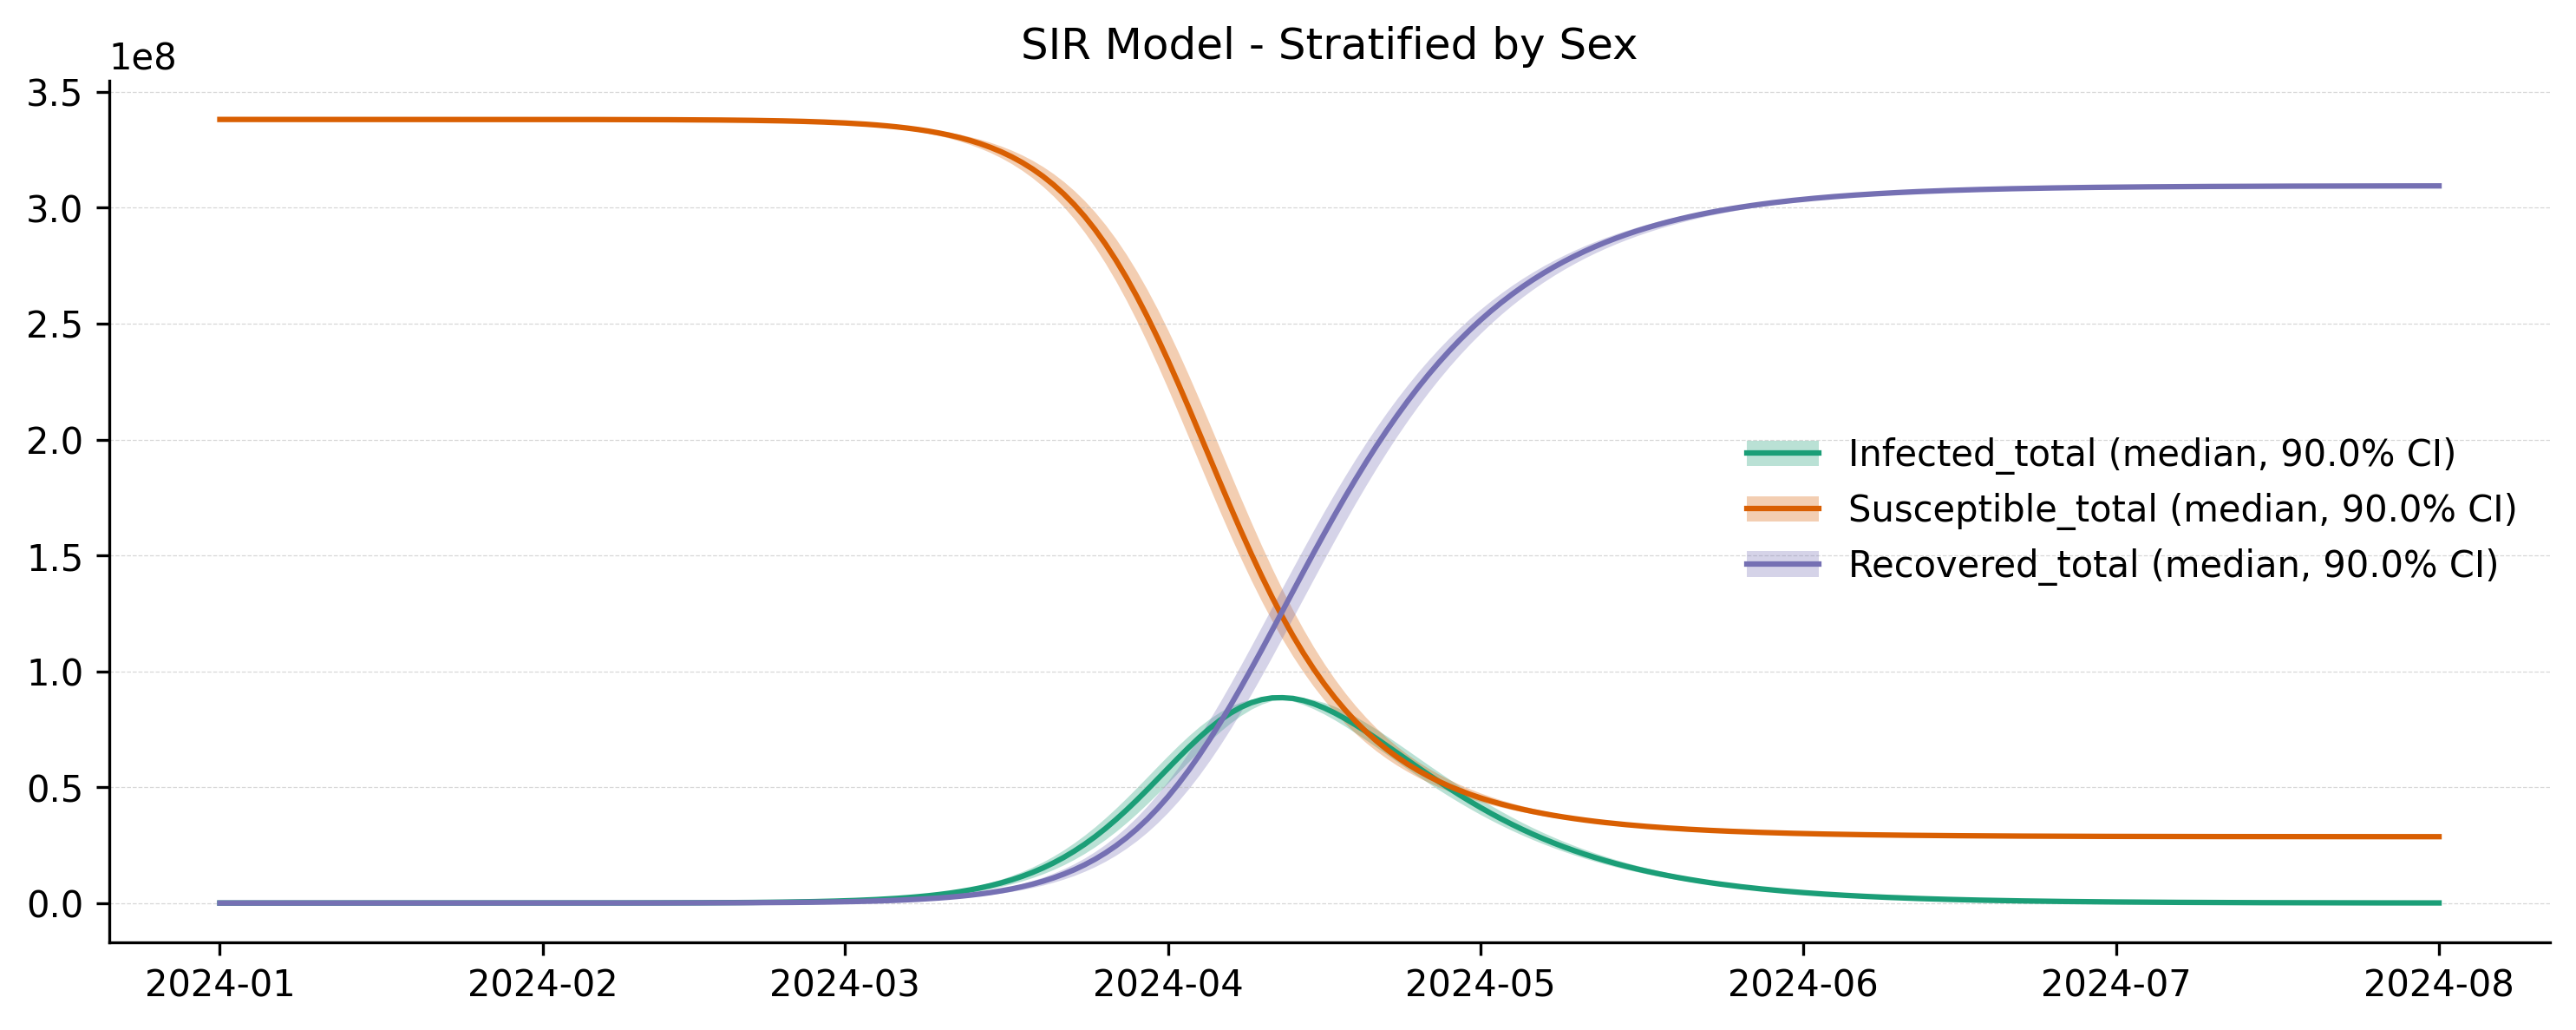

In [26]:
# Run simulations
results_sex = model_sex.run_simulations(
    start_date="2024-01-01",
    end_date="2024-08-01",
    percentage_in_agents=100 / model_sex.population.Nk.sum(),
    Nsim=100
)

# Plot total compartments
df_q = results_sex.get_quantiles_compartments()
ax = plot_quantiles(df_q, columns=["Infected_total", "Susceptible_total", "Recovered_total"],
                    legend_loc="center right")
ax.set_title("SIR Model - Stratified by Sex")

Text(0.5, 1.0, 'Infections by Sex')

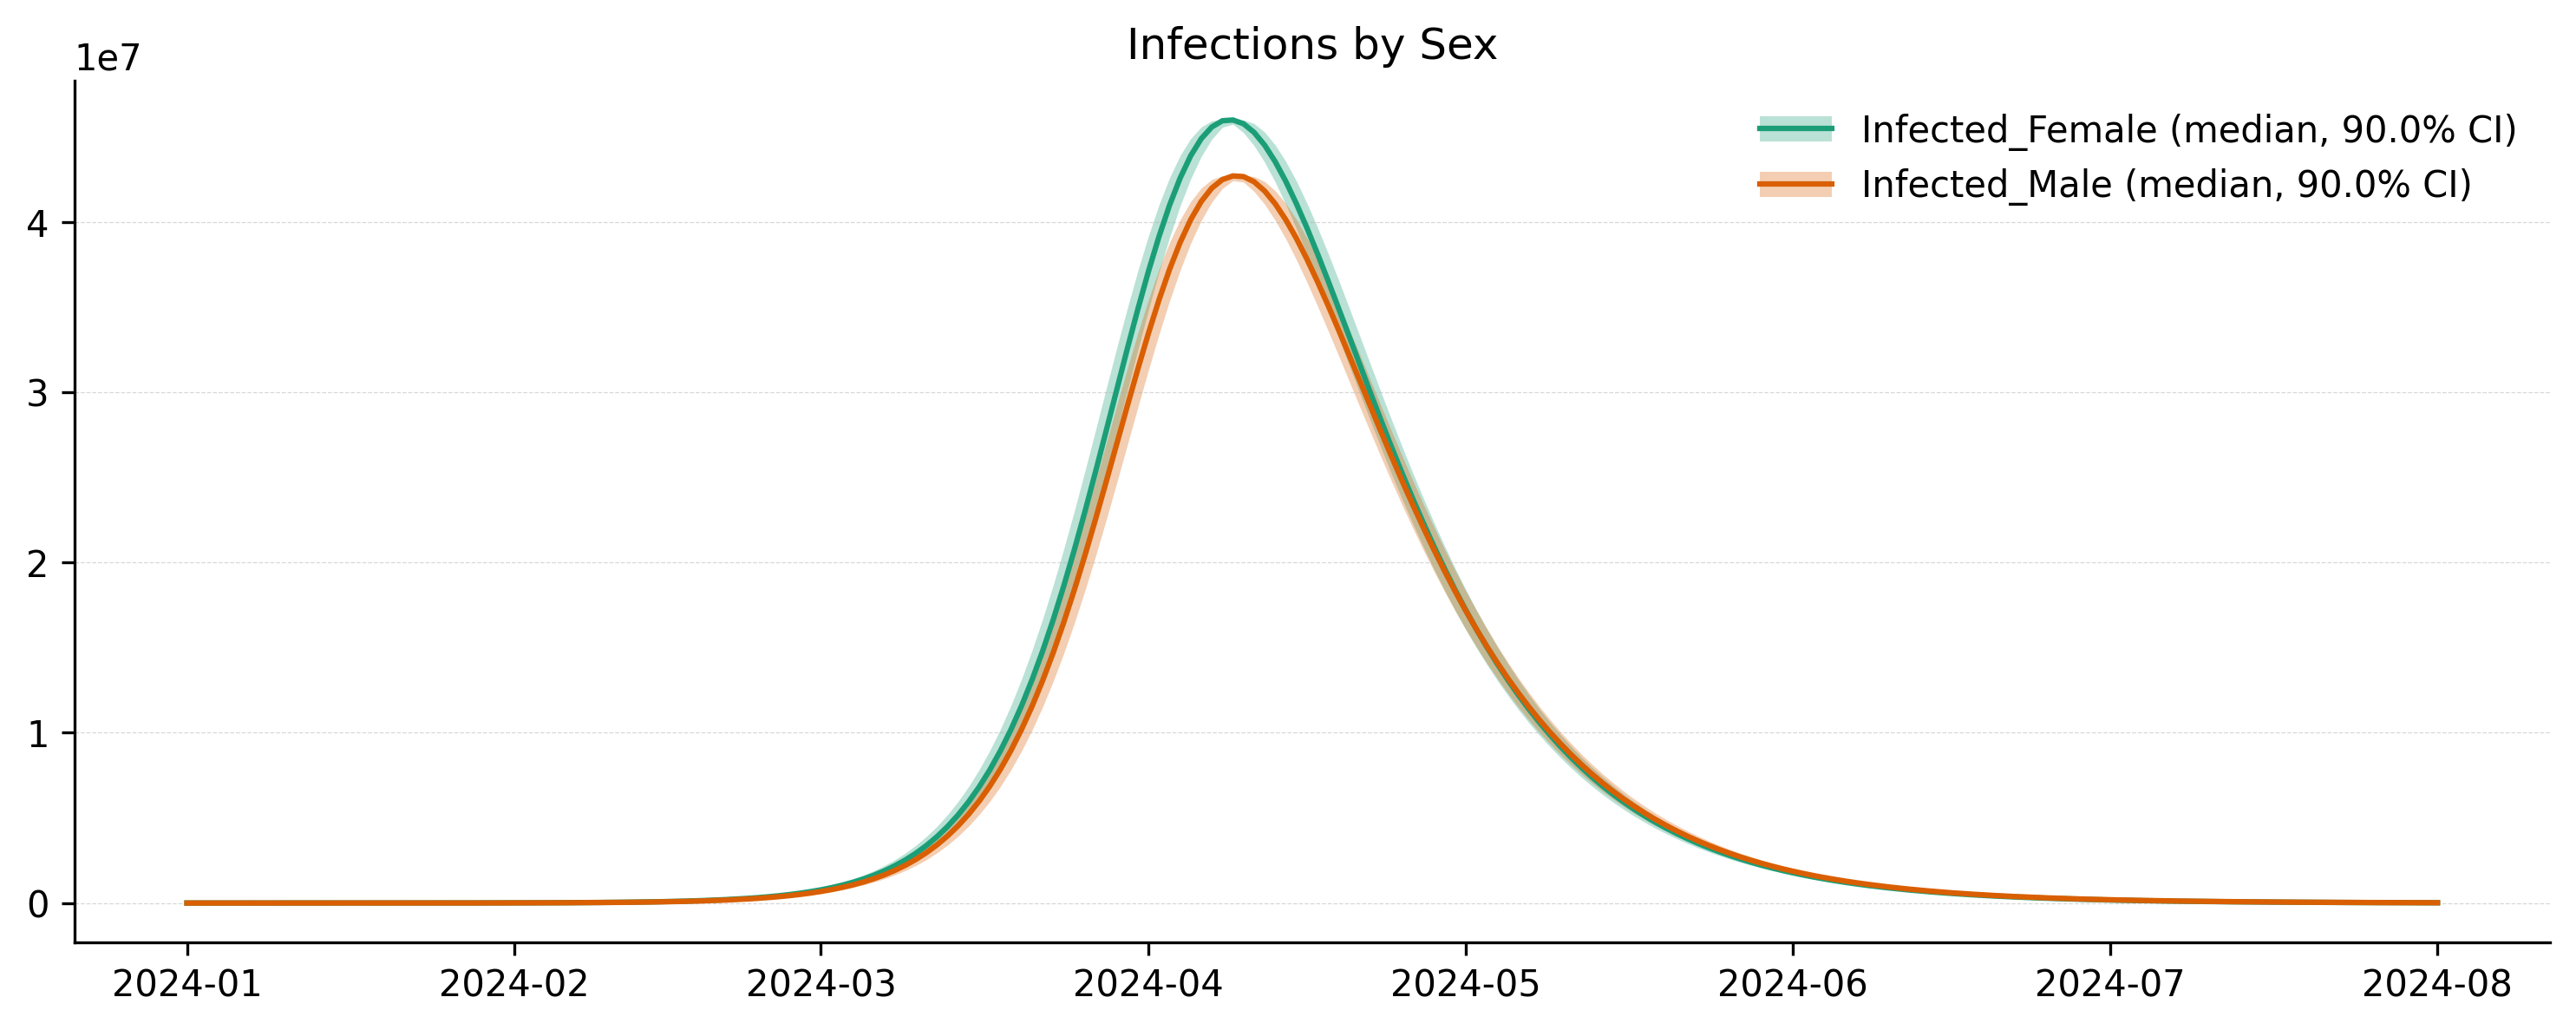

In [23]:
# Plot infections by sex group
infected_cols = [f"Infected_{name}" for name in pop_sex.Nk_names]
ax = plot_quantiles(df_q, columns=infected_cols, legend_loc="upper right")
ax.set_title("Infections by Sex")

## 6. Running an SIR Simulation by Race/Ethnicity

We can do the same using the race/ethnicity-stratified population.

Text(0.5, 1.0, 'SIR Model - Stratified by Race/Ethnicity')

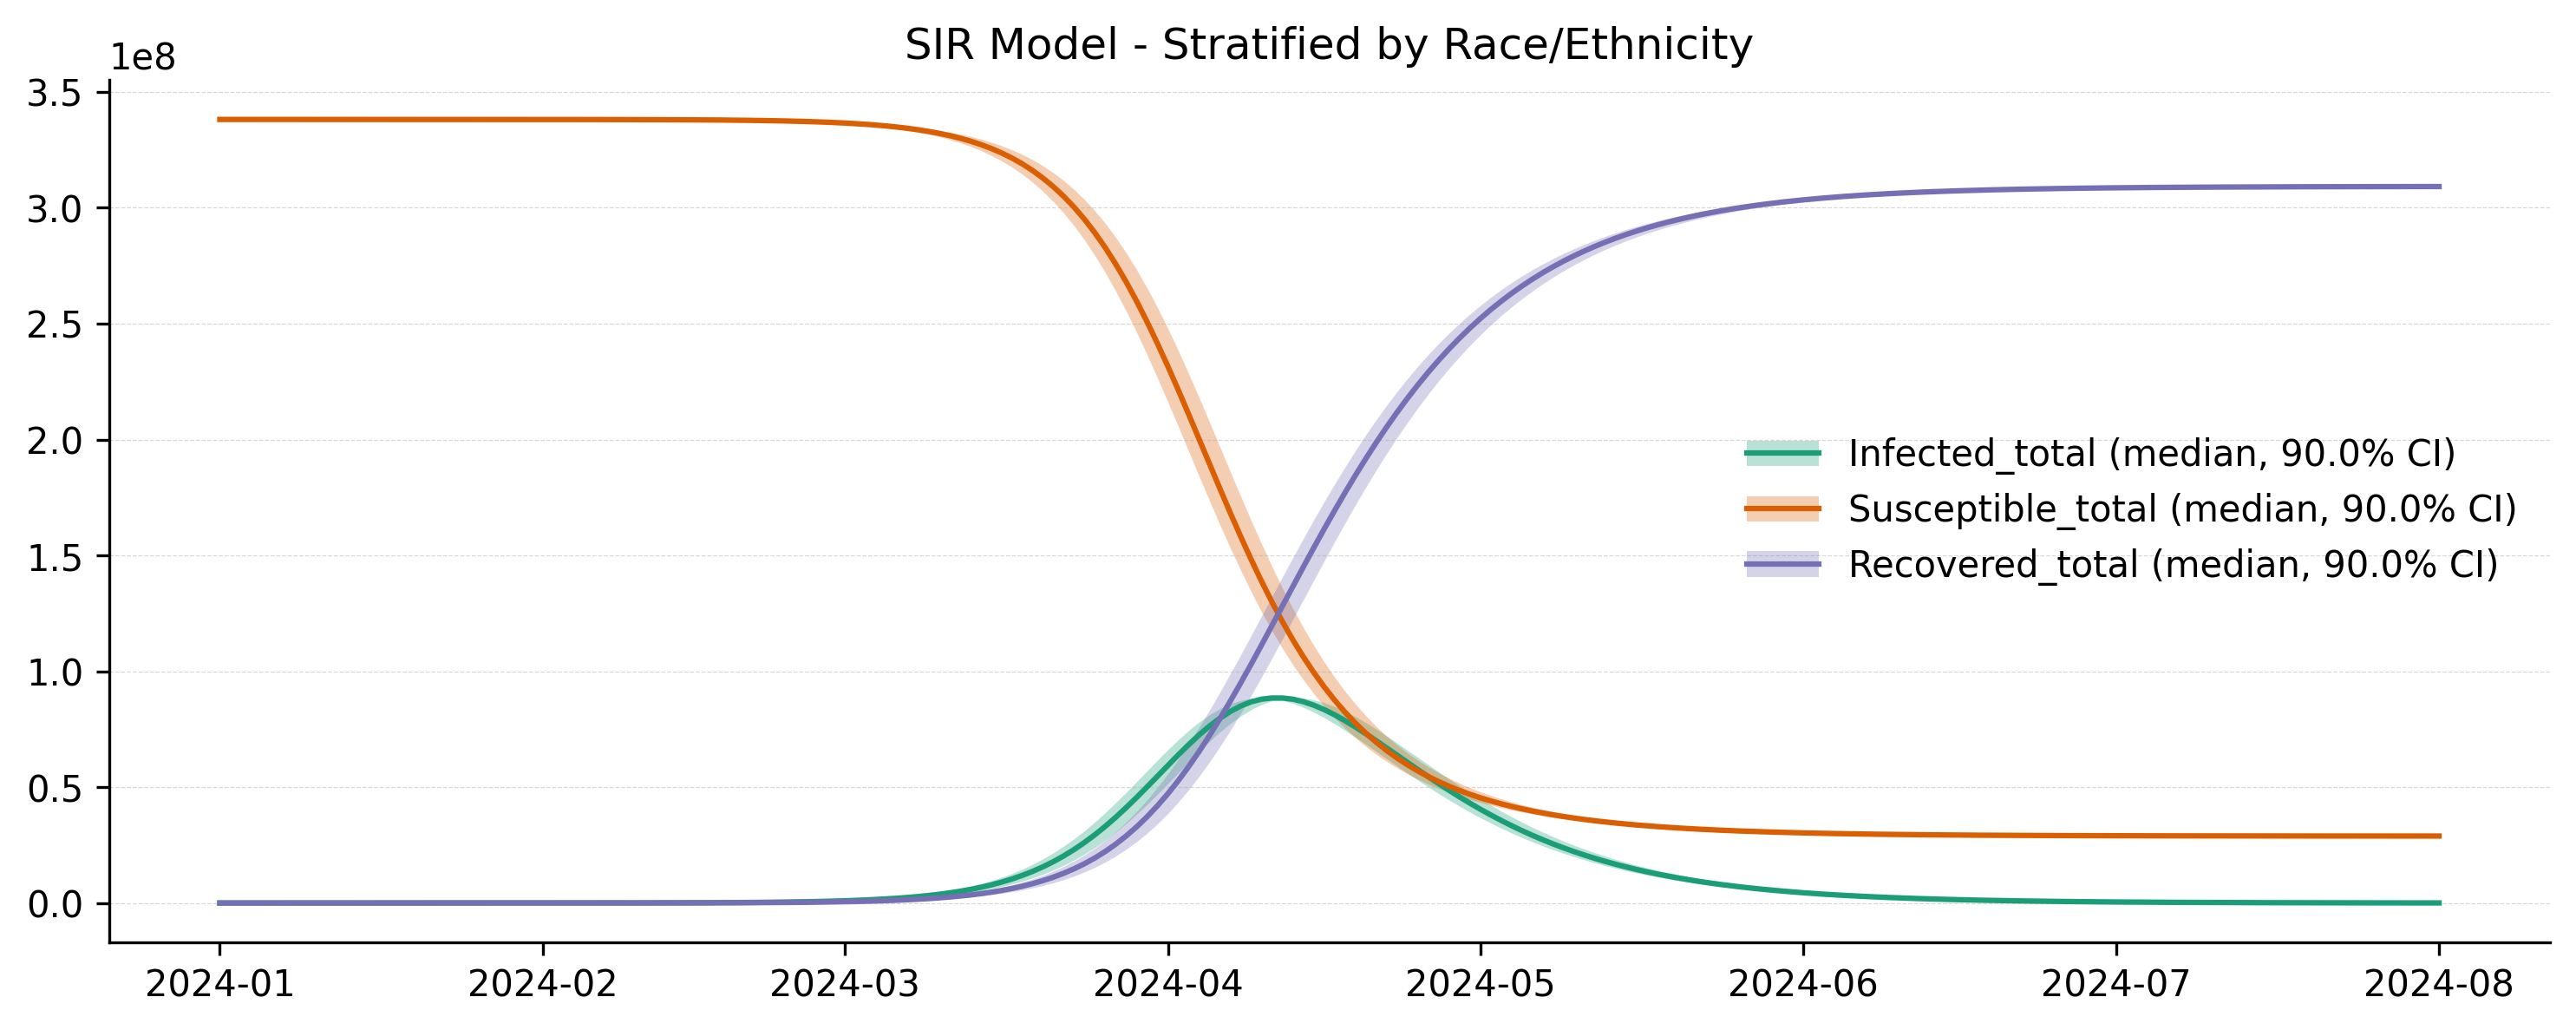

In [25]:
# Create an SIR model
model_race = load_predefined_model("SIR", transmission_rate=0.035, recovery_rate=0.1)

# Set the race/ethnicity-stratified population
model_race.set_population(pop_race)

# Run simulations
results_race = model_race.run_simulations(
    start_date="2024-01-01",
    end_date="2024-08-01",
    percentage_in_agents=100 / model_race.population.Nk.sum(),
    Nsim=100
)

# Plot total compartments
df_q_race = results_race.get_quantiles_compartments()
ax = plot_quantiles(df_q_race, columns=["Infected_total", "Susceptible_total", "Recovered_total"],
                    legend_loc="center right")
ax.set_title("SIR Model - Stratified by Race/Ethnicity")

Text(0.5, 1.0, 'Infections by Race/Ethnicity')

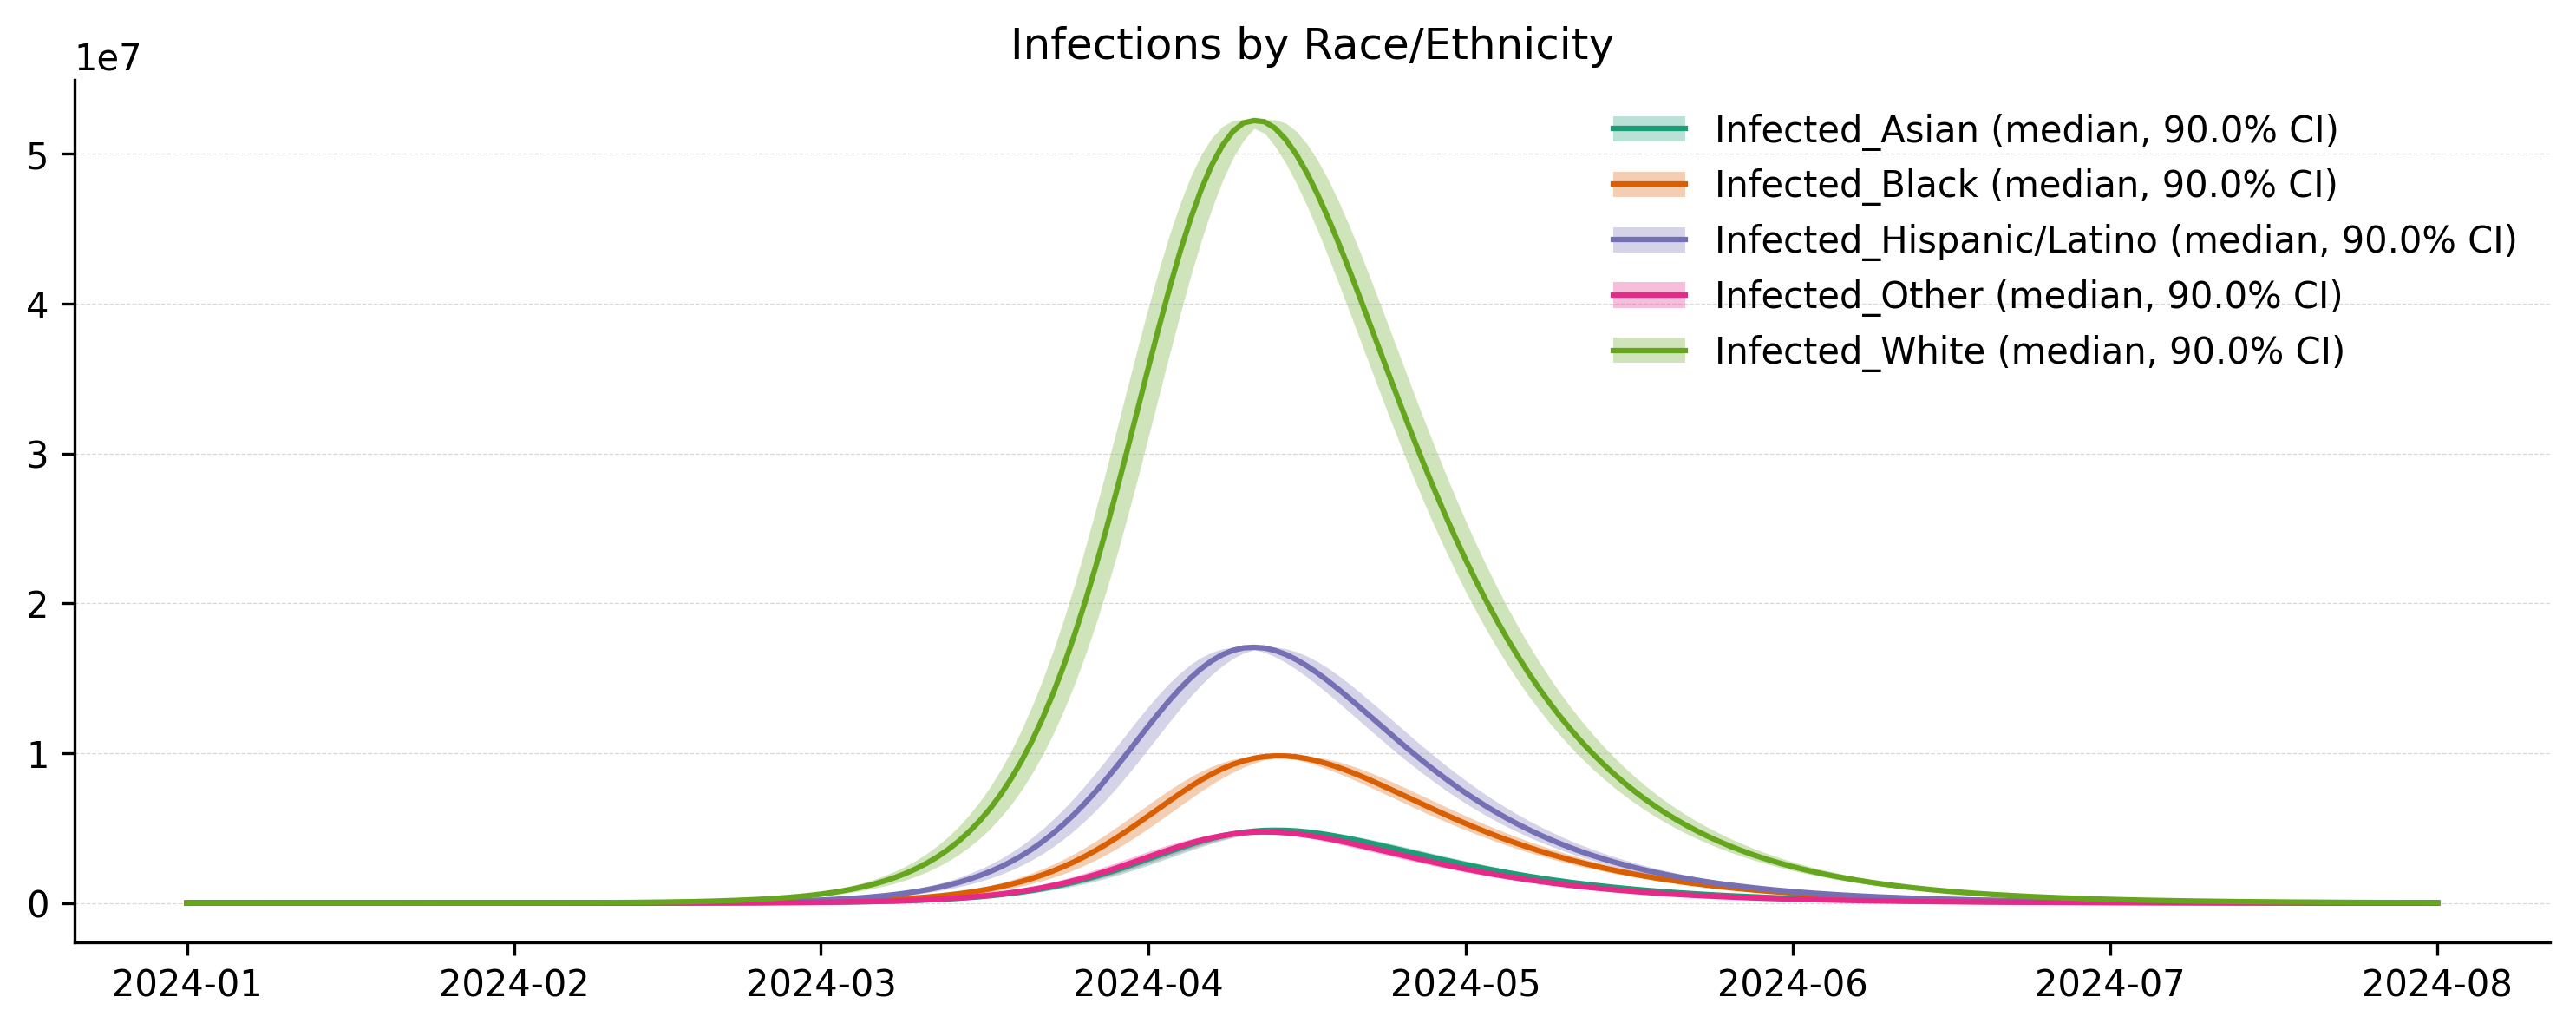

In [27]:
# Plot infections by race/ethnicity group
infected_cols_race = [f"Infected_{name}" for name in pop_race.Nk_names]
ax = plot_quantiles(df_q_race, columns=infected_cols_race, legend_loc="upper right")
ax.set_title("Infections by Race/Ethnicity")

## 7. Comparing Attack Rates Across Demographic Groups

The attack rate is the fraction of the population that was infected over the course of the epidemic (i.e., the percentage recovered at the end of the simulation). Let's compare attack rates across demographic groups for both the sex and race/ethnicity stratifications.

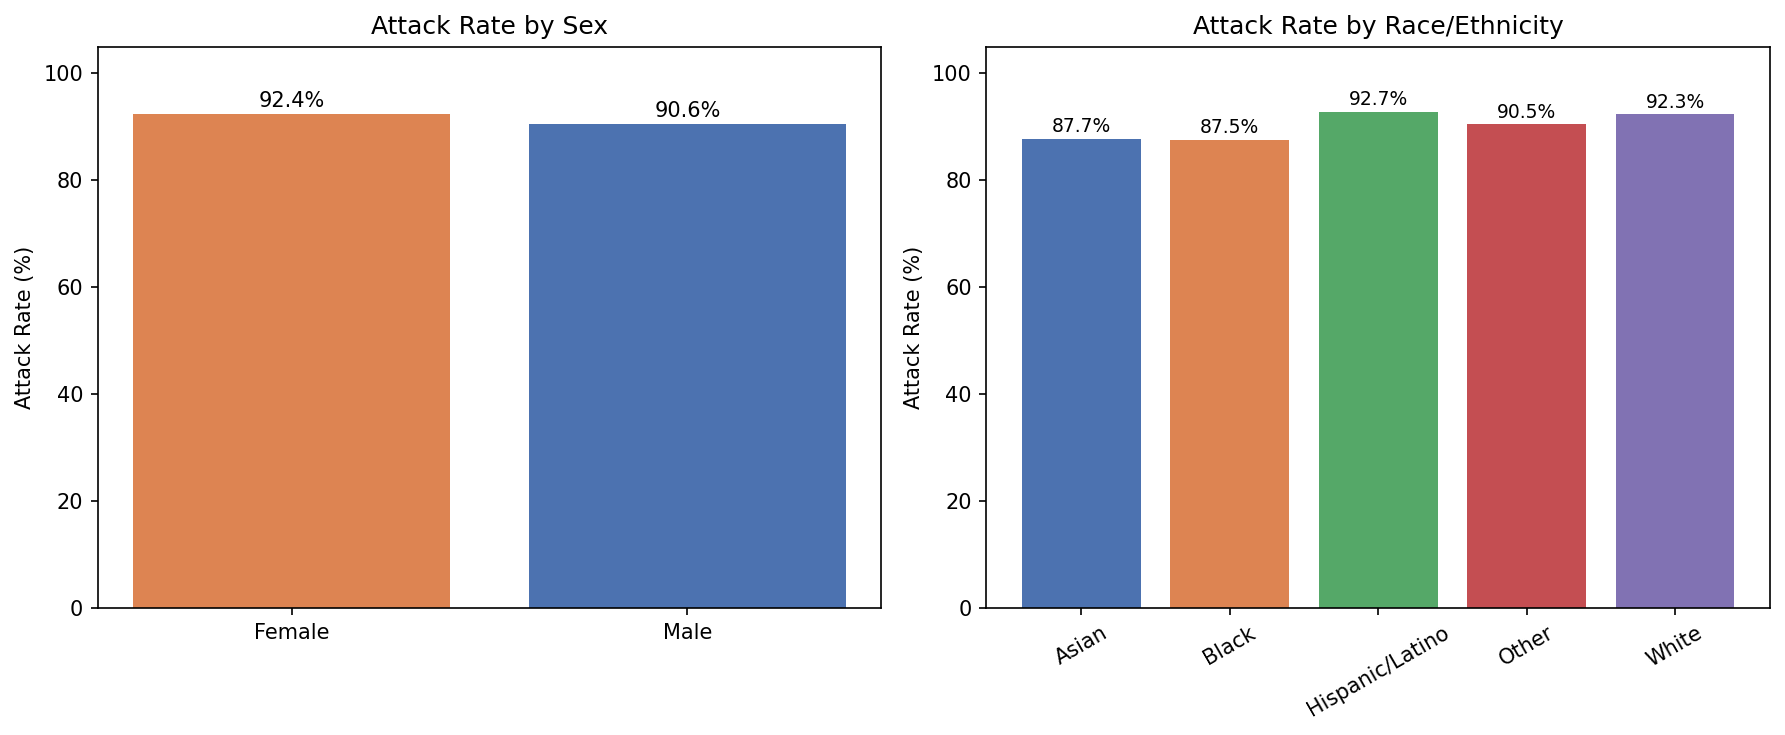

In [28]:
def compute_attack_rates(df_quantiles, population, compartment="Recovered"):
    """Compute attack rate (% recovered at end) per demographic group from median quantiles."""
    last_row = df_quantiles[df_quantiles["quantile"] == 0.5].iloc[-1]
    
    attack_rates = {}
    for name, nk in zip(population.Nk_names, population.Nk):
        col = f"{compartment}_{name}"
        attack_rates[name] = last_row[col] / nk * 100
    return attack_rates

# Compute attack rates
ar_sex = compute_attack_rates(df_q, pop_sex)
ar_race = compute_attack_rates(df_q_race, pop_race)

# Plot side by side
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), dpi=150)

# Sex
bars = axes[0].bar(ar_sex.keys(), ar_sex.values(), color=["#DD8452", "#4C72B0"])
for bar, val in zip(bars, ar_sex.values()):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                 f"{val:.1f}%", ha="center", va="bottom", fontsize=10)
axes[0].set_ylabel("Attack Rate (%)")
axes[0].set_title("Attack Rate by Sex")
axes[0].set_ylim(0, 105)

# Race/Ethnicity
bars = axes[1].bar(ar_race.keys(), ar_race.values(), color=["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3"])
for bar, val in zip(bars, ar_race.values()):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                 f"{val:.1f}%", ha="center", va="bottom", fontsize=9)
axes[1].set_ylabel("Attack Rate (%)")
axes[1].set_title("Attack Rate by Race/Ethnicity")
axes[1].tick_params(axis="x", rotation=30)
axes[1].set_ylim(0, 105)

plt.tight_layout()